### Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)

In [14]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
# Let's check the dimensions of the dataframe
s_data.shape

(25, 2)

In [17]:
# let's look at the statistical aspects of the dataframe
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
# Let's see the type of each column
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
## Adding up the missing values (column-wise)
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

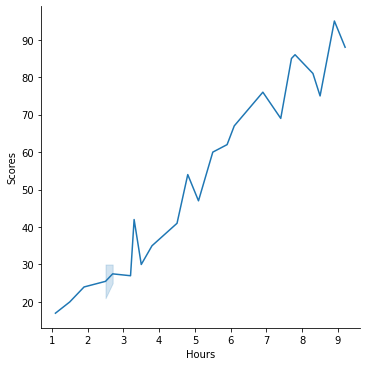

In [21]:
sns.relplot(x='Hours', y='Scores', kind='line', data=s_data)

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).#

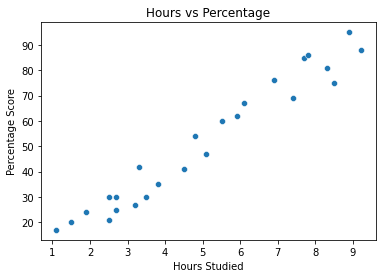

In [4]:
# Plotting the distribution of scores
sns.scatterplot(x=s_data['Hours'],y=s_data['Scores'])
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
x=np.array(s_data['Hours']).reshape(-1,1)
y=np.array(s_data['Scores'])

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [7]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [8]:
#plotting the regression line
line= regressor.coef_*x+regressor.intercept_


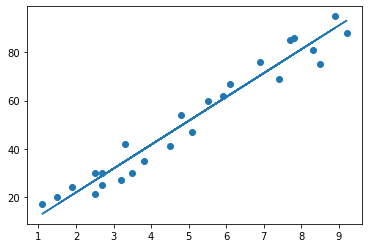

In [9]:
#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line);

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
# You can also test with your own data
hours =np.array([[9.25]]) 
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[[0]]))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


# Evaluating the model
The final step is to evaluate the perfomance of algorithm.It shows the errors of the algorithm .This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics#  

In [13]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
